In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

matplotlib.style.use('ggplot') # Look Pretty



def drawLine(model, X_test, y_test, title, R2):
  # This convenience method will take care of plotting your
  # test observations, comparing them to the regression line,
  # and displaying the R2 coefficient
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.scatter(X_test, y_test, c='g', marker='o')
  ax.plot(X_test, model.predict(X_test), color='orange', linewidth=1, alpha=0.7)

  title += " R2: " + str(R2)
  ax.set_title(title)
  print title
  print "Intercept(s): ", model.intercept_

  plt.show()

def drawPlane(model, X_test, y_test, title, R2):
  # This convenience method will take care of plotting your
  # test observations, comparing them to the regression plane,
  # and displaying the R2 coefficient
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.set_zlabel('prediction')

  # You might have passed in a DataFrame, a Series (slice),
  # an NDArray, or a Python List... so let's keep it simple:
  X_test = np.array(X_test)
  col1 = X_test[:,0]
  col2 = X_test[:,1]

  # Set up a Grid. We could have predicted on the actual
  # col1, col2 values directly; but that would have generated
  # a mesh with WAY too fine a grid, which would have detracted
  # from the visualization
  x_min, x_max = col1.min(), col1.max()
  y_min, y_max = col2.min(), col2.max()
  x = np.arange(x_min, x_max, (x_max-x_min) / 10)
  y = np.arange(y_min, y_max, (y_max-y_min) / 10)
  x, y = np.meshgrid(x, y)

  # Predict based on possible input values that span the domain
  # of the x and y inputs:
  z = model.predict(  np.c_[x.ravel(), y.ravel()]  )
  z = z.reshape(x.shape)

  ax.scatter(col1, col2, y_test, c='g', marker='o')
  ax.plot_wireframe(x, y, z, color='orange', alpha=0.7)
  
  title += " R2: " + str(R2)
  ax.set_title(title)
  print title
  print "Intercept(s): ", model.intercept_
  
  plt.show()

//anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [11]:
#
# INFO: Let's get started!


#
# TODO: First, as is your habit, inspect your dataset in a text
# editor, or spread sheet application. The first thing you should
# notice is that the first column is both unique (the name of each)
# college, as well as unlabeled. This is a HINT that it must be the
# index column. If you do not indicate to Pandas that you already
# have an index column, it'll create one for you, which would be
# undesirable since you already have one.
#
# Review the .read_csv() documentation and discern how to load up
# a dataframe while indicating which existing column is to be taken
# as an index. Then, load up the College dataset into a variable
# called X:
#
# .. your code here ..
X = pd.read_csv('Datasets/College.csv', index_col=0)
print(X.describe())
print(X.head(5))

               Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      

In [12]:
#
# INFO: This line isn't necessary for your purposes; but we'd just
# like to show you an additional way to encode features directly.
# The .map() method is like .apply(), but instead of taking in a
# lambda / function, you simply provide a mapping of keys:values.
# If you decide to embark on the "Data Scientist Challenge", this
# line of code will save you the trouble of converting it through
# other means:
#X.Private = X.Private.map({'Yes':1, 'No':0})


#
# TODO: Create your linear regression model here and store it in a
# variable called 'model'. Don't actually train or do anything else
# with it yet:
#
# .. your code here ..
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [18]:
#
# INFO: The first relationship we're interested in is the amount
# charged for room and board, as a function of the number of
# accepted students. 

#
# TODO: Using indexing, create two slices (series). One will just
# store the room and board column, the other will store the accepted
# students column. 
roomBoard = X[['Room.Board']]
accStudents = X[['Accept']]

# Then use train_test_split to cut your data up
# into X_train, X_test, y_train, y_test, with a test_size of 30% and
# a random_state of 7.
#
# Since the objective is to model the amount charged for room and
# board as a function() of the number of accepted students, it should
# be clear to you that your output will be the room and board amount,
# and your input will be the accepted students amount.
#
# .. your code here ..
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( accStudents,roomBoard, test_size=0.30, random_state=7)


In [19]:
#
# TODO: Fit and score your model appropriately. Store the score in the
# score variable.
#
# .. your code here ..
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

Accept(Room&Board) R2: 0.00621145388529
Intercept(s):  [ 4267.31235734]


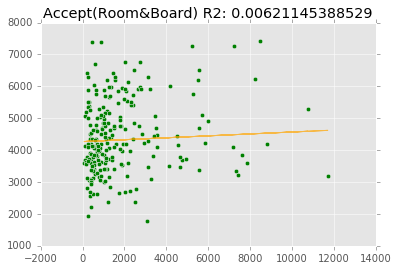

In [20]:
# INFO: We'll take it from here, buddy:
drawLine(model, X_test, y_test, "Accept(Room&Board)", score)

In [25]:
# 
# TODO: Duplicate the process above; this time, model the number of
# enrolled students per college, as a function of the number of accepted
# students
#
# .. your code here ..
enrolled = X[['Enroll']]
X_train, X_test, y_train, y_test = train_test_split( accStudents,enrolled, test_size=0.30, random_state=7)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

Accept(Enroll) R2: 0.855342644734
Intercept(s):  [ 90.84497523]


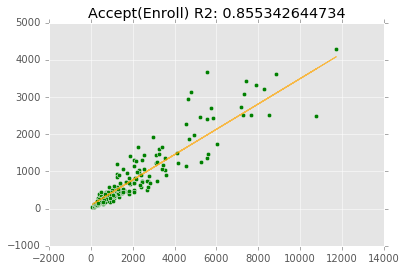

In [24]:
drawLine(model, X_test, y_test, "Accept(Enroll)", score)

Accept(F.Undergrad) R2: 0.776149586058
Intercept(s):  [ 279.79077705]


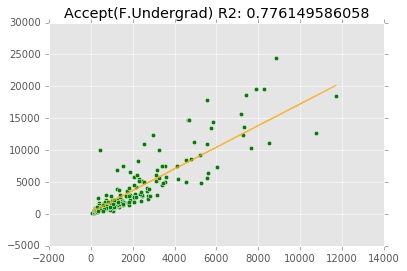

In [26]:
# 
# TODO: Duplicate the process above; this time, model the number of
# failed undergraduate students per college, as a function of the number
# of accepted students
#
# .. your code here ..
failed = X[['F.Undergrad']]
X_train, X_test, y_train, y_test = train_test_split( accStudents,enrolled, test_size=0.30, random_state=7)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

drawLine(model, X_test, y_test, "Accept(F.Undergrad)", score)

0.876437177421
Accept(Room&Board,Enroll) R2: 0.876437177421
Intercept(s):  [-1176.62848249]


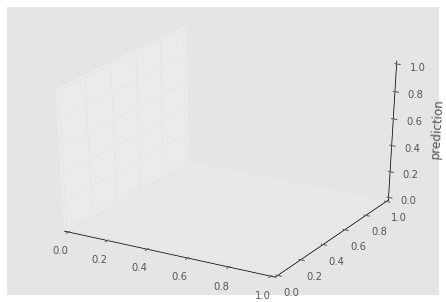

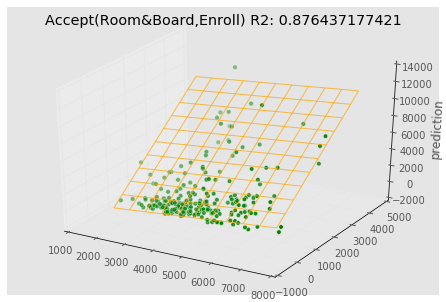

In [38]:
#
# TODO: Duplicate the process above (almost). This time is going to be
# a bit more complicated. Instead of modeling one feature as a function
# of another, you will attempt to do multivariate linear regression to
# model one feature as a function of TWO other features.
#
# Model the number of accepted students, as a function of the amount
# charged for room and board, AND the number of enrolled students. To do
# this, instead of creating a regular slice for a single-feature input,
# simply create a slice that contains both columns you wish to use as
# inputs. Your training labels will remain a single slice.
#
# .. your code here ..
rbe = X[['Room.Board', 'Enroll']]
X_train, X_test, y_train, y_test = train_test_split(rbe, accStudents, test_size=0.30, random_state=7)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)
drawPlane(model, X_test, y_test, "Accept(Room&Board,Enroll)", score)
#
# INFO: That concludes this assignment

In [37]:
print(rbe.head(5))
X_test = np.array(X_test)
print(X_test[:,0])

                              Room.Board  Enroll
Abilene Christian University        3300     721
Adelphi University                  6450     512
Adrian College                      3750     336
Agnes Scott College                 5450     137
Alaska Pacific University           4120      55
[3615 7398 5500 4410 4170 3735 4234 4130 3150 5302 5050 5970 3352 4191 3700
 3996 5160 5885 5220 4040 5900 3396 2619 4378 4202 5400 3052 6510 4552 3700
 5490 5550 4689 4190 3180 4697 5050 3100 5175 4298 3585 3540 3460 3119 4210
 4928 4460 5770 5600 6408 5995 3620 4081 3400 6192 4624 4350 4840 4488 2217
 3600 3962 7270 6770 4980 4350 4100 2700 3176 3858 3400 6430 5160 3950 4200
 3978 6507 4680 3122 4675 4108 3550 5680 5841 4550 3363 3610 1780 3400 5340
 4440 4190 4620 3560 2370 4365 3600 3380 3700 3800 6300 3084 7400 5420 3250
 6750 5084 4755 3728 3730 4500 4600 3346 7262 5000 5208 3706 3050 3144 5916
 2570 4100 4530 3485 6690 2800 5411 4080 4710 4070 3384 6246 2703 5950 3540
 4208 3505 2987 4650 4

In [ ]:
# INFO + HINT On Fitting, Scoring, and Predicting:
#
# Here's a hint to help you complete the assignment without pulling
# your hair out! When you use .fit(), .score(), and .predict() on
# your model, SciKit-Learn expects your training data to be in
# spreadsheet (2D Array-Like) form. This means you can't simply
# pass in a 1D Array (slice) and get away with it.
#
# To properly prep your data, you have to pass in a 2D Numpy Array,
# or a dataframe. But what happens if you really only want to pass
# in a single feature?
#
# If you slice your dataframe using df[['ColumnName']] syntax, the
# result that comes back is actually a *dataframe*. Go ahead and do
# a type() on it to check it out. Since it's already a dataframe,
# you're good -- no further changes needed.
#
# But if you slice your dataframe using the df.ColumnName syntax,
# OR if you call df['ColumnName'], the result that comes back is
# actually a series (1D Array)! This will cause SKLearn to bug out.
# So if you are slicing using either of those two techniques, before
# sending your training or testing data to .fit / .score, do a
# my_column = my_column.reshape(-1,1). This will convert your 1D
# array of [n_samples], to a 2D array shaped like [n_samples, 1].
# A single feature, with many samples.
#
# If you did something like my_column = [my_column], that would produce
# an array in the shape of [1, n_samples], which is incorrect because
# SKLearn expects your data to be arranged as [n_samples, n_features].
# Keep in mind, all of the above only relates to your "X" or input
# data, and does not apply to your "y" or labels.





#
# Data Scientist Challenge
# ========================
#
# You've experimented with a number of feature scaling techniques
# already, such as MaxAbsScaler, MinMaxScaler, Normalizer, StandardScaler
# and more from http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
# 
# What happens if you apply scaling to your data before doing 
# linear regression? Would it alter the quality of your results?
# Do the scalers that work on a per-feature basis, such as MinMaxScaler
# behave differently that those that work on a multi-feature basis, such
# as normalize? And moreover, once your features have been scaled, you
# won't be able to use the resulting regression directly... unless you're
# able to .inverse_transform() the scaling. Do all of the SciKit-Learn
# scalers support that?
#
# This is your time to shine and to show how much of an explorer you are:
# Dive deeper into uncharted lands, browse SciKit-Learn's documentation,
# scour Google, ask questions on Quora, Stack-Overflow, and the course
# message board, and see if you can discover something that will be of
# benefit to you in the future!